In [17]:
import albumentations as A
import albumentations.pytorch
from torch.utils.data import Dataset
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage


In [18]:
class AlbumentationsDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = cv2.imread(file_path)
        # BGR -> RGB 변환
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 이미지 변환 적용
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

In [6]:
class AlbumentationsDataset(Dataset):
    def __init__(self, file_paths, labels, transforms=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = cv2.imread(file_path)
        # BGR -> RGB 변환
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 이미지 변경
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

albumentations_transform = A.Compose([
    A.Resize(256, 256),
    A.RandomCrop(224, 224),
    A.RandomRotate90(p =1),
    A.HorizontalFlip(), 
    A.GaussNoise(p=1),
    A.pytorch.ToTensorV2()
])


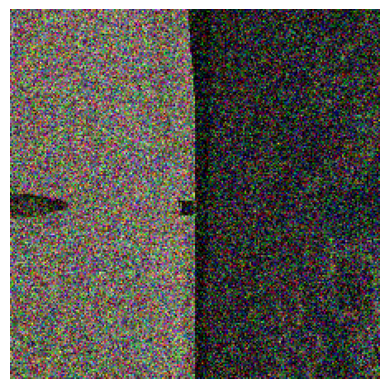

In [23]:
albumentations_dataset = AlbumentationsDataset(
    file_paths=["./Image-Detection-2/train/images/capture_0000_png.rf.50333dc182c003bae1683484a09902ad.jpg"],
    labels=[0],
    transform=albumentations_transform
)

for i in range(len(albumentations_dataset)):
    sample, _ = albumentations_dataset[0]

    plt.figure()
    to_pil = ToPILImage()
    pil_image = to_pil(sample)
    plt.imshow(pil_image)
    plt.axis('off')
    plt.show()